### 1. First we found out that music feature are in between (0,1) except Loudness.

In [ ]:
df['Loudness']

0         -5176.0
1         -5176.0
2         -4019.0
3         -5678.0
4         -5678.0
           ...   
651931    -6644.0
651932   -10908.0
651933    -5779.0
651934    -6125.0
651935    -6125.0
Name: Loudness, Length: 651936, dtype: float64

In [ ]:
df['Loudness'].shape

(651936,)

### 2. Normally, The loudness could be between -60 and 0 decibel, so we check how many data exceed this interval

In [ ]:
((df['Loudness'] < -60) | (df['Loudness'] > 0)).value_counts()

Loudness
True     587229
False     64707
Name: count, dtype: int64

### 3. We decided to seperate data into 2 groups which are not in interval and interval.

In [ ]:
loudness_range = (-60, 0)
non_outlier_loudness_mask = ((df['Loudness'] >= loudness_range[0]) & (df['Loudness'] <= loudness_range[1]))
non_outlier_loudness = df[(df['Loudness'] >=loudness_range[0]) & (df['Loudness'] <= loudness_range[1])]

In [ ]:
print("Before cleaning :",df.shape)
print("After cleaning :",non_outlier_loudness.shape)

Before cleaning : (651936, 20)
After cleaning : (64707, 20)


### 4. We decided to plot histogram to check distribution

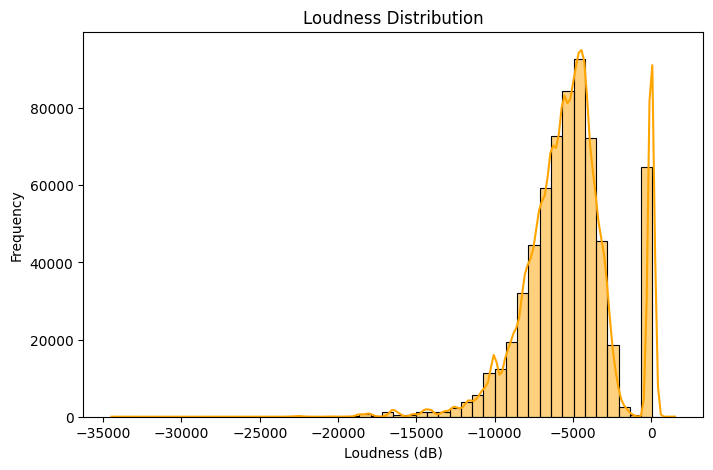

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Loudness'], bins=50, kde=True, color='orange')
plt.title('Loudness Distribution')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frequency')
plt.show()

### 5. Since our data is in mmdB we need to divide by 10000 
convert Loudness column (mmdB -> dB)

In [ ]:


# 2. Isolate the 'Other Data' (Outliers) using the negation operator (~)
# We use .copy() to create an independent DataFrame, preventing SettingWithCopyWarning.
df_loudness_outliers = df[~non_outlier_loudness_mask].copy()

# 3. Apply the Transformation: Divide *only* the 'Loudness' column by 1000
df_loudness_outliers['Loudness'] = df_loudness_outliers['Loudness'] / 1000

# 4. Combine the Cleaned Data (df_new) and the Scaled Outlier Data (df_outliers)
df_combined = pd.concat([df_loudness_outliers, non_outlier_loudness])
df = df_combined
print("Shape of the combined DataFrame:", df_combined.shape)
print("Transformation completed on 'Loudness' for outlier rows.")

Shape of the combined DataFrame: (651936, 20)
Transformation completed on 'Loudness' for outlier rows.


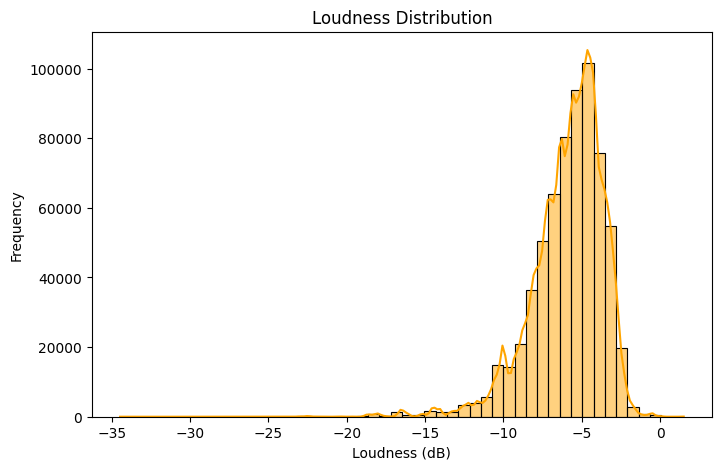

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Loudness'], bins=50, kde=True, color='orange')
plt.title('Loudness Distribution')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Loudness'].describe()

count    651936.000000
mean         -5.897752
std           2.304712
min         -34.475000
25%          -7.067000
50%          -5.520000
75%          -4.325000
max           1.509000
Name: Loudness, dtype: float64

In [ ]:
print(df['Loudness'].max(), df['Loudness'].min())

1.509 -34.475


 ### 6. Check data that have Loudness > 0 dB

In [ ]:
print("Number of Loudness > 0 :",df[df['Loudness'] > 0].shape[0])
print('All value more than 0 dB',df[df['Loudness'] > 0]['Loudness'].sort_values().unique())

Number of Loudness > 0 : 113
All value more than 0 dB [1.750e-04 9.630e-04 1.509e+00]


In [ ]:
df[df['Loudness'] > 0].head(10)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
28941,179,Puta Mexica,"DJ Jeeh FDC, MC Menor MT, Yuri Redicopa, Mc Pelé",18/02/2023,0.853,0.913,0.000963,0.051,0.655,0.024,0.952,Artist 1,DJ Jeeh FDC,Nationality 1,Brazil,Latin-America,22,6.0,4mD9hjoTckjeL1CrJCx0MT,https://open.spotify.com/track/4mD9hjoTckjeL1C...
28942,179,Puta Mexica,"DJ Jeeh FDC, MC Menor MT, Yuri Redicopa, Mc Pelé",18/02/2023,0.853,0.913,0.000963,0.051,0.655,0.024,0.952,Artist 2,MC Menor MT,Nationality 2,Brazil,Latin-America,22,6.0,4mD9hjoTckjeL1CrJCx0MT,https://open.spotify.com/track/4mD9hjoTckjeL1C...
28943,179,Puta Mexica,"DJ Jeeh FDC, MC Menor MT, Yuri Redicopa, Mc Pelé",18/02/2023,0.853,0.913,0.000963,0.051,0.655,0.024,0.952,Artist 3,Yuri Redicopa,Nationality 3,Brazil,Latin-America,22,6.0,4mD9hjoTckjeL1CrJCx0MT,https://open.spotify.com/track/4mD9hjoTckjeL1C...
28944,179,Puta Mexica,"DJ Jeeh FDC, MC Menor MT, Yuri Redicopa, Mc Pelé",18/02/2023,0.853,0.913,0.000963,0.051,0.655,0.024,0.952,Artist 4,Mc Pelé,Nationality 4,Brazil,Latin-America,22,6.0,4mD9hjoTckjeL1CrJCx0MT,https://open.spotify.com/track/4mD9hjoTckjeL1C...
30612,198,Puta Mexica,"DJ Jeeh FDC, MC Menor MT, Yuri Redicopa, Mc Pelé",12/02/2023,0.853,0.913,0.000963,0.051,0.655,0.024,0.952,Artist 1,DJ Jeeh FDC,Nationality 1,Brazil,Latin-America,3,1.0,4mD9hjoTckjeL1CrJCx0MT,https://open.spotify.com/track/4mD9hjoTckjeL1C...
30613,198,Puta Mexica,"DJ Jeeh FDC, MC Menor MT, Yuri Redicopa, Mc Pelé",12/02/2023,0.853,0.913,0.000963,0.051,0.655,0.024,0.952,Artist 2,MC Menor MT,Nationality 2,Brazil,Latin-America,3,1.0,4mD9hjoTckjeL1CrJCx0MT,https://open.spotify.com/track/4mD9hjoTckjeL1C...
30614,198,Puta Mexica,"DJ Jeeh FDC, MC Menor MT, Yuri Redicopa, Mc Pelé",12/02/2023,0.853,0.913,0.000963,0.051,0.655,0.024,0.952,Artist 3,Yuri Redicopa,Nationality 3,Brazil,Latin-America,3,1.0,4mD9hjoTckjeL1CrJCx0MT,https://open.spotify.com/track/4mD9hjoTckjeL1C...
30615,198,Puta Mexica,"DJ Jeeh FDC, MC Menor MT, Yuri Redicopa, Mc Pelé",12/02/2023,0.853,0.913,0.000963,0.051,0.655,0.024,0.952,Artist 4,Mc Pelé,Nationality 4,Brazil,Latin-America,3,1.0,4mD9hjoTckjeL1CrJCx0MT,https://open.spotify.com/track/4mD9hjoTckjeL1C...
30910,159,Puta Mexica,"DJ Jeeh FDC, MC Menor MT, Yuri Redicopa, Mc Pelé",11/02/2023,0.853,0.913,0.000963,0.051,0.655,0.024,0.952,Artist 1,DJ Jeeh FDC,Nationality 1,Brazil,Latin-America,42,10.0,4mD9hjoTckjeL1CrJCx0MT,https://open.spotify.com/track/4mD9hjoTckjeL1C...
30911,159,Puta Mexica,"DJ Jeeh FDC, MC Menor MT, Yuri Redicopa, Mc Pelé",11/02/2023,0.853,0.913,0.000963,0.051,0.655,0.024,0.952,Artist 2,MC Menor MT,Nationality 2,Brazil,Latin-America,42,10.0,4mD9hjoTckjeL1CrJCx0MT,https://open.spotify.com/track/4mD9hjoTckjeL1C...


### 7. Normally Song that has decibel over 0 will be distored so we decided to convert them to 0 to make it sensible

In [ ]:
print("Number of songs have Loudness > 0 : ",df[df['Loudness'] > 0]['Title'].unique().shape[0])
print("Song : ",df[df['Loudness'] > 0]['Title'].unique())

Number of songs have Loudness > 0 :  3
Song :  ['Puta Mexica' 'Na Raba Toma Tapão'
 'Welcome to the Party (with French Monta & Lil Pump, feat. Zhavia Ward) - from Deadpool 2']


In [ ]:
df.loc[df['Loudness'] > 0, 'Loudness'] = 0
print("Number of songs have Loudness > 0 : ",df[df['Loudness'] > 0]['Title'].unique().shape[0])

Number of songs have Loudness > 0 :  0


In [ ]:
df['Loudness'].describe()

count    651936.000000
mean         -5.897808
std           2.304552
min         -34.475000
25%          -7.067000
50%          -5.520000
75%          -4.325000
max           0.000000
Name: Loudness, dtype: float64

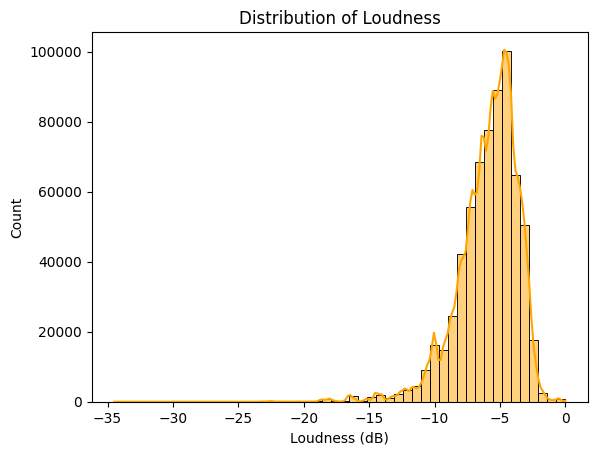

In [ ]:
sns.histplot(df['Loudness'], bins=50, kde=True, color='orange')
plt.title('Distribution of Loudness')
plt.xlabel('Loudness (dB)')
plt.show()

<Axes: xlabel='Loudness'>

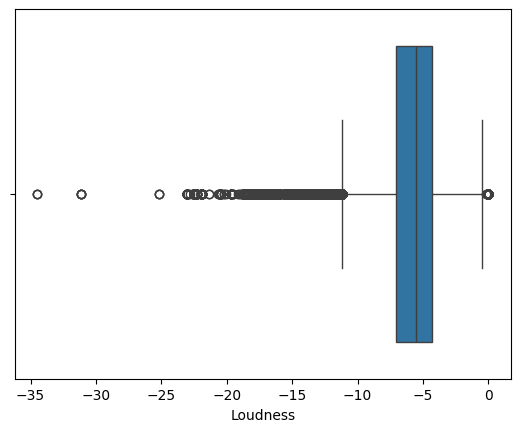

In [ ]:
sns.boxplot(x=df['Loudness'])

### 8. After we did a boxplot for loudness, we found out it has some outliers. We decided to drop it

In [ ]:
threshold = -25 

total = len(df)

outliers = len(df[df['Loudness'] < threshold])

percentage = (outliers / total) * 100

print(f"Number of songs with Loudness < {threshold} dB: {outliers:,}")
print(f"Percentage of total: {percentage:.2f}%")

Number of songs with Loudness < -25 dB: 11
Percentage of total: 0.00%


In [ ]:
df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5.176,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5.176,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4.019,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5.678,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5.678,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651848,123,Photograph,Ed Sheeran,01/01/2017,0.614,0.379,-10.480,0.048,0.607,0.000,0.201,Artist 1,Ed Sheeran,Nationality 1,United Kingdom,Europe,78,78.0,6fxVffaTuwjgEk5h9QyRjy,https://open.spotify.com/track/6fxVffaTuwjgEk5...
651875,148,Dynamite (feat. Pretty Sister),Nause,01/01/2017,0.811,0.801,-6.000,0.080,0.055,0.000,0.693,Artist 1,Nause,Nationality 1,Sweden,Europe,53,53.0,2Ae5awwKvQpTBKQHr1TYCg,https://open.spotify.com/track/2Ae5awwKvQpTBKQ...
651886,157,Love On The Brain,Rihanna,01/01/2017,0.509,0.637,-4.830,0.047,0.072,0.000,0.378,Artist 1,Rihanna,Nationality 1,Barbados,Anglo-America,44,44.0,2aksifNn5ph8igDOkPBA02,https://open.spotify.com/track/2aksifNn5ph8igD...
651887,158,Desde Esa Noche (feat. Maluma),Thalia,01/01/2017,0.780,0.929,-0.739,0.053,0.171,0.000,0.837,Artist 1,Thalia,Nationality 1,Mexico,Latin-America,43,43.0,1pWYnQIlqxTh5bxuPmTG4E,https://open.spotify.com/track/1pWYnQIlqxTh5bx...


In [ ]:
df.to_csv('outlier_loudness.csv', index=False, sep =';')